# Doppler shift observation of a rotating sound source
## AI Code generation was by CoPilot ThinkDeeper on Windows 11, in two requests:
1. write a python program to obtain the angular rotational rate of a sound source going around a circle as measured by a microphone in the same plane of the circle, but some distance away. The microphone signal is measured with a spectrum analyzer with high resolution.
2. The model does not take into account that a microphone is being used to measure the pressure amplitude. It only deals with the change in frequency due to rotation. Make the model as an experiment would be done, with a rotating sound source and a microphone located some distance away from the rotating sound source.

## Here is the code description.
Below is an example Python program that more realistically “mimics” an experiment. In this simulation the sound source rotates on a circle while emitting a single-frequency tone. A microphone positioned some distance away records the sound pressure signal. Because the source moves relative to the microphone the measured pressure waveform is both amplitude‐modulated (due to the varying distance) and frequency‑modulated (due to the Doppler effect). We then “analyze” the pressure signal—by demodulating its phase using a Hilbert transform—to retrieve its instantaneous frequency and from that extract the rotation (modulation) rate.

### In our simulation we assume the following:

• The source rotates on a circle of radius R at an angular rate ω_true. • The microphone is fixed at a point (for example, at (3, 0) when the circle’s center is at (0, 0)). • The pressure amplitude decays approximately as 1/r where r is the instantaneous distance from the source to the microphone. • The observed instantaneous frequency is given by the Doppler formula (using a low-speed, linear approximation). • We generate the pressure signal as   p(t) = (A₀/r[t]) × sin(Φ(t))  with   Φ(t) = 2π ∫₀ᵗ f_obs(t′) dt′. • Finally, we compute the instantaneous frequency (by taking the derivative of the analytic-phase computed via a Hilbert transform) and then take its Fourier transform. The lowest-frequency peak in the frequency deviation (f_inst – f₀) is dominated by the modulation frequency caused by rotation. Multiplying that modulation frequency by 2π returns the estimated angular rotation rate.

## Explanation of the Code
### Simulation of the Experiment:

The source rotates along a circle. Its position is computed as (R cos(ωt), R sin(ωt)).

The microphone, at a fixed point (here, (3, 0)), sees a time-dependent distance r. This causes amplitude modulation (via an 1/r falloff) in the measured pressure.

The Doppler effect is computed by finding the source’s radial velocity (using the dot product of the tangential velocity vector and the unit vector toward the microphone). The observed instantaneous frequency is given as

𝑓<sub><small>obs</small></sub>=𝑓<sub><small>0</small></sub>*(1+𝑣𝑟/𝑐)
.
The instantaneous phase is obtained by numerically integrating f_obs. 
The microphone pressure signal is then modeled by this phase and the corresponding amplitude.

# Analysis to Extract the Rotation Rate:

We use the Hilbert transform to determine the analytic signal from the pressure waveform.

Upon unwrapping the phase and differentiating, we obtain the instantaneous frequency. 
Its deviation from the carrier (f₀) is due to the Doppler shifts.

By performing an FFT on the frequency deviation, we detect a small modulation peak. 
The frequency (in Hz) of this peak equals the rotation frequency (cycles per second). 
Multiplying it by 2π yields the angular rotation rate in radians per second.

## Visualization:

The simulation plots show the raw microphone signal, the extracted instantaneous frequency, and the FFT of the frequency deviation with the detected modulation frequency clearly marked.

This code thereby models an experimental scenario where a rotating sound source is measured via a pressure amplitude signal at a microphone. The method mimics what one would do in the lab by using a high‑resolution spectrum analyzer to extract subtle Doppler modulations and then convert those into an angular rotation rate.

Feel free to adjust the parameters (such as f₀, R, ω_true, fs, or T) to better match your experimental setup or to explore various regimes.


 
True angular rotation rate (rad/s): 4.71238898038469
Estimated modulation frequency (Hz): 0.75
Estimated angular rotation rate (rad/s): 4.71238898038469


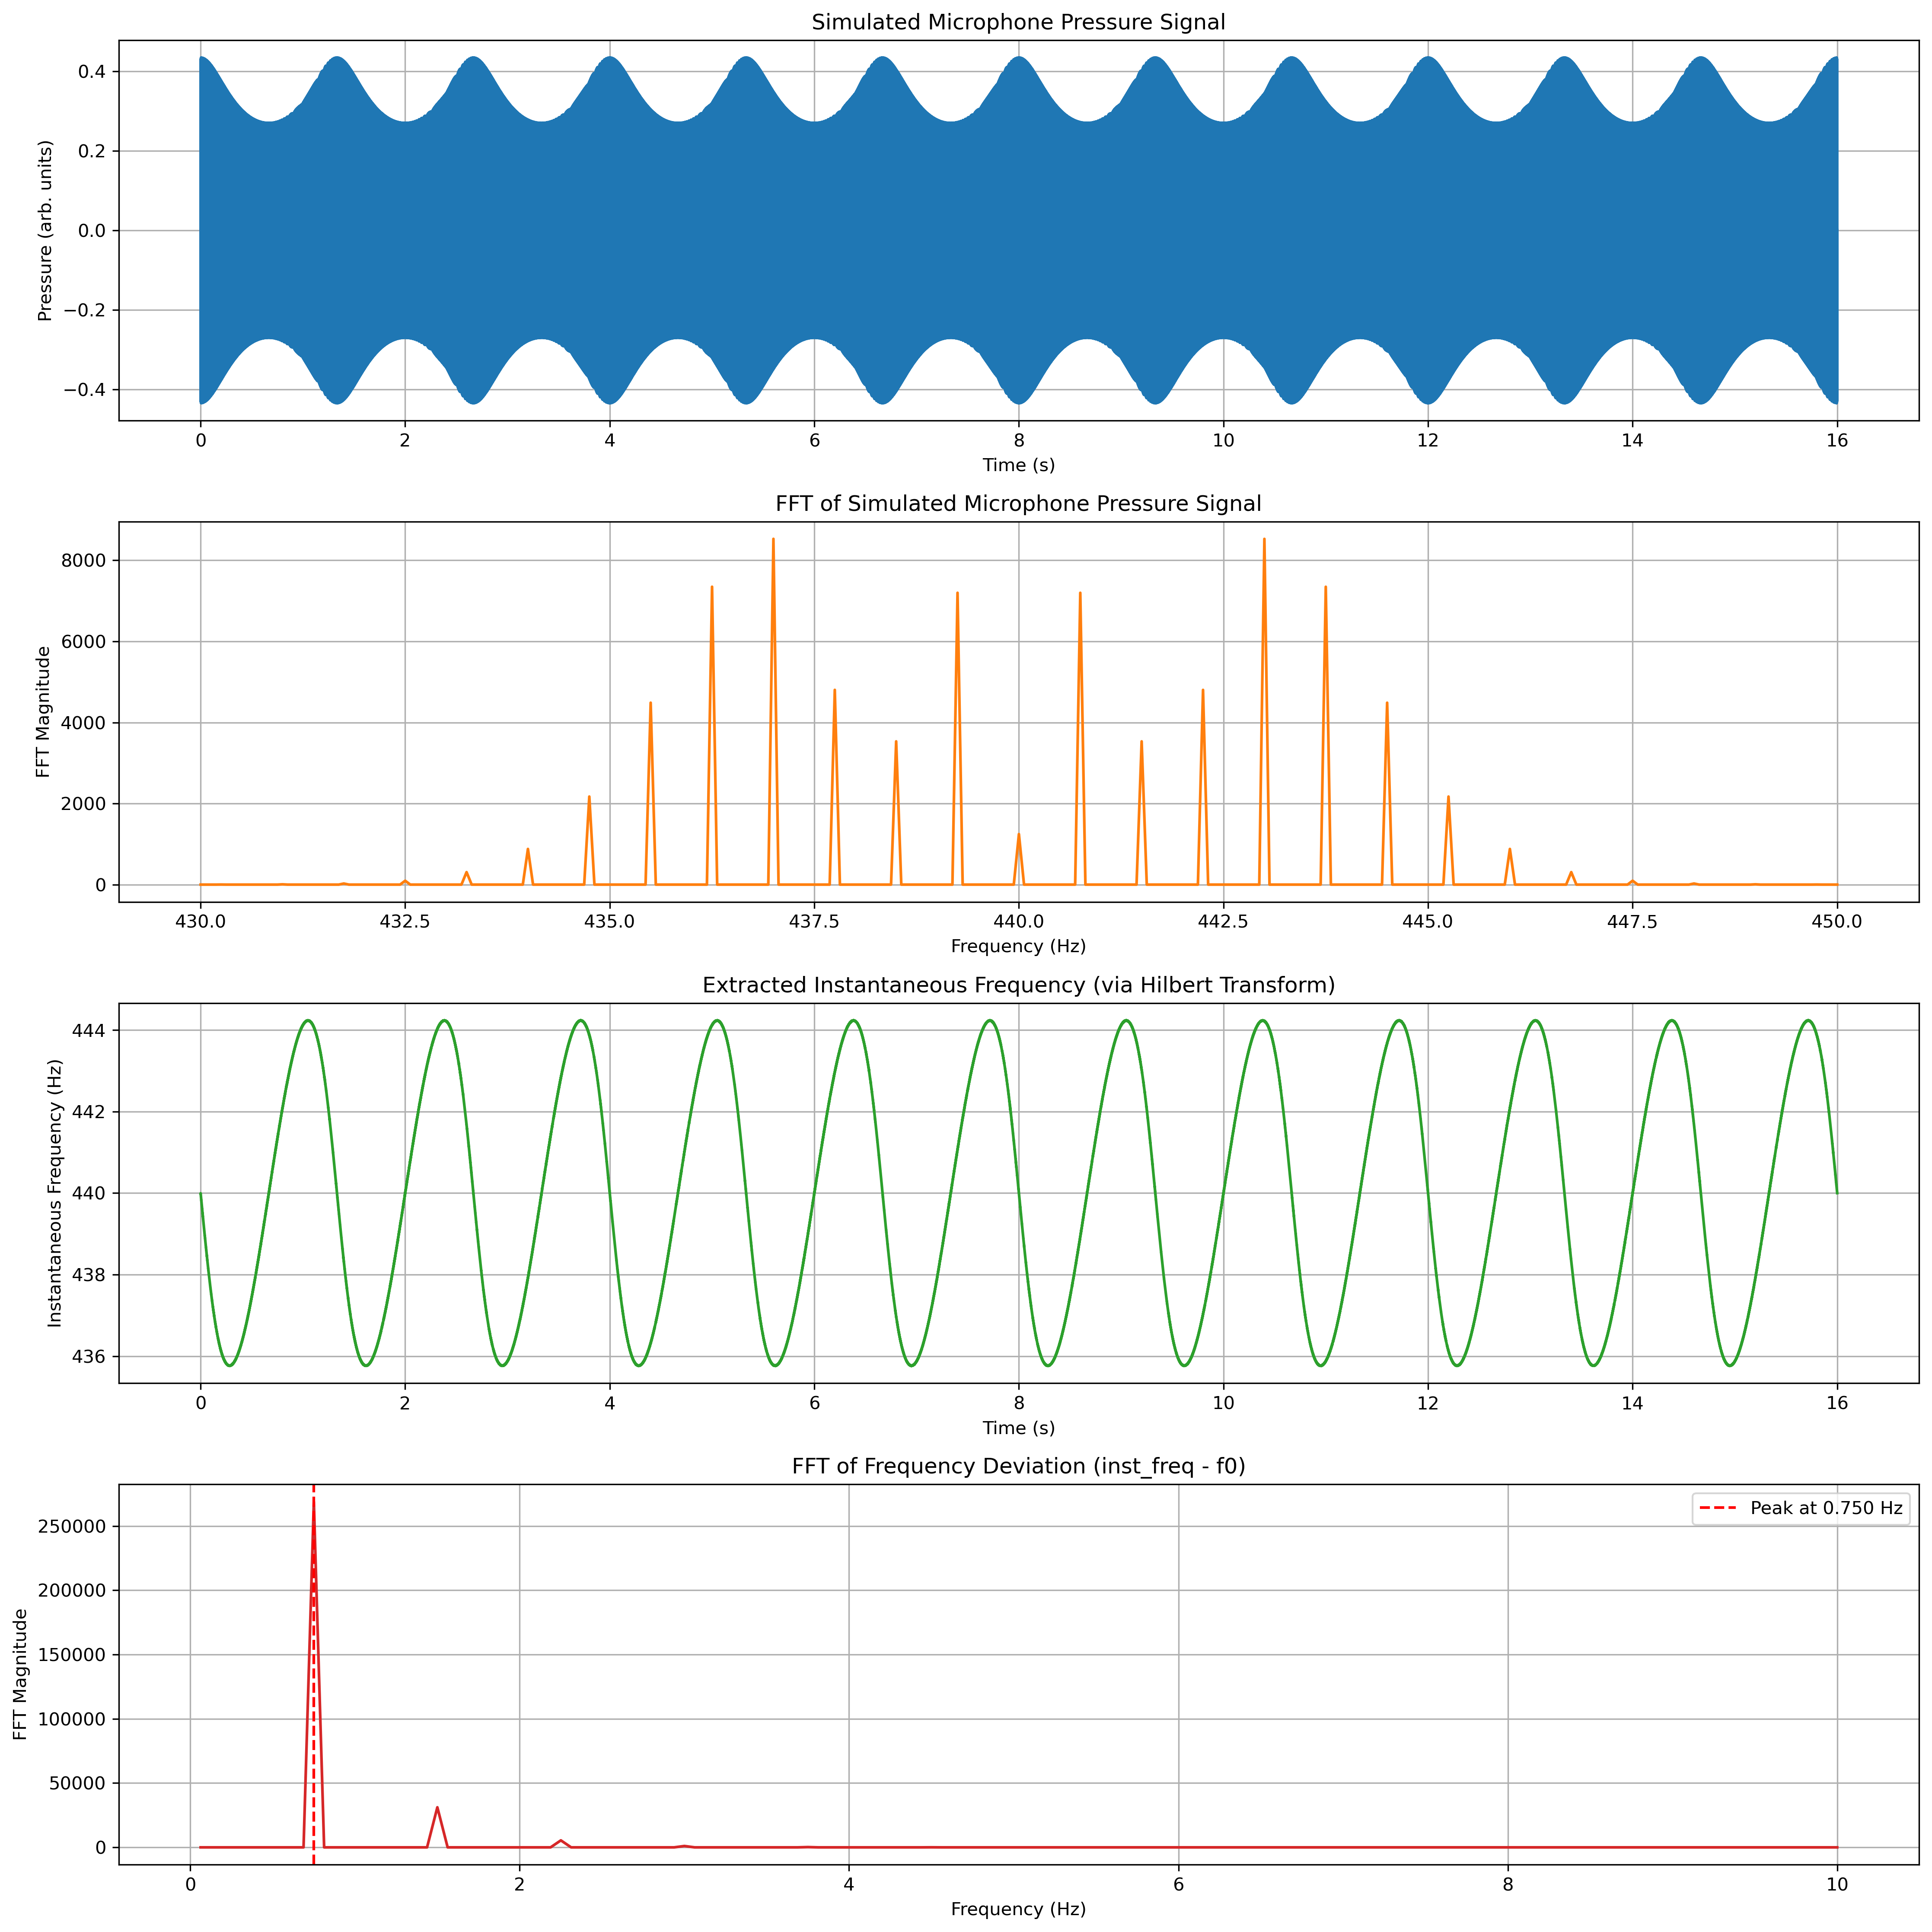

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# -----------------------------
# Simulation Parameters
# -----------------------------
# For a realistic simulation of an audible tone, we use:
fs = 8000          # Sampling frequency in Hz
T  = 16           # Total duration in seconds (to capture several rotations)
t  = np.linspace(0, T, int(fs * T), endpoint=False)

# -----------------------------
# Physical Parameters as inputs. 
# -----------------------------
f0 = 440.0         # Emitted (carrier) frequency in Hz
R = 0.7            # Radius of the circular path in meters
omega_true = 45*2*np.pi/60   # True angular rotation rate in rad/s (period ≈ 12.57 s)
c = 343.0          # Speed of sound in air (m/s)
A0 = 1.0           # Source amplitude (arbitrary units)
# Optionally, add some random measurement noise:
noise_amplitude = 0.000001

# Microphone position (in the same horizontal plane)
mic_x = 3.0        # x-coordinate
mic_y = 0.0        # y-coordinate

# -----------------------------
# Simulate the Source Motion & Mic Geometry
# -----------------------------
# Source position as a function of time (rotating about the origin)
x_source = R * np.cos(omega_true * t)
y_source = R * np.sin(omega_true * t)

# Compute the instantaneous distance from source to microphone
dx = mic_x - x_source
dy = mic_y - y_source
r = np.sqrt(dx**2 + dy**2)
# Pressure amplitude decays as 1/r
A_signal = A0 / r

# -----------------------------
# Compute the Doppler-Shifted Frequency
# -----------------------------
# Source velocity components (tangent to the circular path)
v_source_x = -R * omega_true * np.sin(omega_true * t)
v_source_y = R * omega_true * np.cos(omega_true * t)
# Unit vector from source to microphone
r_unit_x = dx / r
r_unit_y = dy / r

# Radial velocity toward/away from the microphone (dot product)
v_r = v_source_x * r_unit_x + v_source_y * r_unit_y

# Low-speed Doppler approximation: f_obs = f0 * [1 + (v_r/c)]
f_obs = f0 * (1 + v_r / c)

# -----------------------------
# Generate the Pressure Signal at the Microphone
# -----------------------------
# Phase is the time-integral of the instantaneous frequency:
phase = 2 * np.pi * np.cumsum(f_obs) / fs
# Microphone pressure signal (sine wave with amplitude attenuation):
p_signal = A_signal * np.sin(phase)

# Optionally, add some measurement noise:
# noise_amplitude = 0.001
p_signal += noise_amplitude * np.random.randn(len(t))

# -----------------------------
# Recover the Modulation (Rotation) Rate from the Pressure Signal
# -----------------------------
# We use the Hilbert transform to obtain the analytic signal,
# then unwrap its phase and differentiate to get the instantaneous frequency.
analytic_signal = hilbert(p_signal)
inst_phase = np.unwrap(np.angle(analytic_signal))
inst_freq = np.gradient(inst_phase, 1/fs) / (2 * np.pi)  # in Hz

# The Doppler modulation appears as a small deviation about f0.
freq_deviation = inst_freq - f0

# Now, compute the FFT of the frequency deviation to find the modulation frequency.
N = len(freq_deviation)
fft_vals = np.fft.fft(freq_deviation)
fft_p_signal = np.fft.fft(p_signal) # FFT of the time domain microphone measurements.
fft_freqs = np.fft.fftfreq(N, d=1/fs)
# Use only the positive frequency components:
pos_mask = fft_freqs > 0
fft_freqs_pos = fft_freqs[pos_mask]
fft_magnitude = np.abs(fft_vals[pos_mask])
fft_p_signal_magnitude = np.abs(fft_p_signal[pos_mask])
# Make another mask for the deviation FFT to narrow it.
dev_mask = (fft_freqs_pos <=10)
fft_freqs_pos_dev=fft_freqs_pos[dev_mask]
fft_magnitude_dev=fft_magnitude[dev_mask]
# Make an additional mask for the raw pressure FFT to only plot near fo.
fmin=f0 - 10.0 
fmax=f0 + 10.0
f_mask = (fft_freqs_pos >= fmin) & (fft_freqs_pos <= fmax)
fft_freqs_raw = fft_freqs_pos[f_mask]
fft_p_signal_raw = fft_p_signal_magnitude[f_mask]

# Identify the modulation peak: this frequency corresponds to the rotation
peak_index = np.argmax(fft_magnitude)
mod_frequency_est = fft_freqs_pos[peak_index]

# In our model, the modulation frequency (in Hz) equals the rotation frequency (cycles/sec),
# so the estimated angular rotation rate is:
omega_est = mod_frequency_est * 2 * np.pi
print(" ") # Add this empty line for clarity.
print("True angular rotation rate (rad/s):", omega_true)
print("Estimated modulation frequency (Hz):", mod_frequency_est)
print("Estimated angular rotation rate (rad/s):", omega_est)

# -----------------------------
# Plot the Results
# -----------------------------
plt.figure(figsize=(15, 15), dpi=300.0)

# 1. Plot the raw microphone pressure signal
plt.subplot(4, 1, 1)
plt.plot(t, p_signal, color='C0')
plt.xlabel("Time (s)")
plt.ylabel("Pressure (arb. units)")
plt.title("Simulated Microphone Pressure Signal")
plt.grid(True)

# 2. Plot the FFT of the raw microphone pressure signal
plt.subplot(4, 1, 2)
plt.plot(fft_freqs_raw, fft_p_signal_raw, color='C1')
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Magnitude")
plt.title("FFT of Simulated Microphone Pressure Signal")
plt.grid(True)

# 3. Plot the extracted instantaneous frequency
plt.subplot(4, 1, 3)
plt.plot(t, inst_freq, color='C2')
plt.xlabel("Time (s)")
plt.ylabel("Instantaneous Frequency (Hz)")
plt.title("Extracted Instantaneous Frequency (via Hilbert Transform)")
plt.grid(True)

# 4. Plot the FFT of the frequency deviation to reveal the modulation frequency
plt.subplot(4, 1, 4)
plt.plot(fft_freqs_pos_dev, fft_magnitude_dev, color='C3')
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Magnitude")
plt.title("FFT of Frequency Deviation (inst_freq - f0)")
plt.axvline(mod_frequency_est, color="red", linestyle="--",
            label=f"Peak at {mod_frequency_est:.3f} Hz")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the plot as a .png file with dpi and size
# output_file = 'OutputFile.png'
# plt.savefig(output_file, format='png')

